# Introduction

##### This project compares the average yearly minimum wage from the years 2015 - 2018 for 31 contries with the average level of happiness for those same countries as reported by the World Happiness Report for the years 2015-2018. I will also focus on countries that had a relatively low minimum wage, but high levels of happiness, and examine the relationship between the reported levels of happiness and the predictor of social support.

##### The amount of money a person makes has traditionally been associated with their capacity for being happy in many parts of the world.  A minimum wage is the lowest renumeration that employers can legally pay their workers--the price floor below which workers may not sell their labor.  Most countries had introduced minimum wage legislation by the end of the 20th century.  

##### I would like to explore how the average minimum wage for a country during the years 2015-2018 compares to its average happiness score during those same years, as well as comparing the happiness scores for countries with relatively low minimum wage, but high happiness scores, to the their social support score.


### Questions:

##### * Do countries with a relatively higher minimum wage correlate significantly with countries that have higher happiness scores?
##### * What is the relationship between the average social suport score for countries with relatively low minimum wage but high happiness scores as compared to the average social support score for countries with relatively high minimum wage and high happiness scores as well as to the average social support score for all countries.


# Methodology

##### Data was taken from the website https://www.kaggle.com accessed on 3/7/2022

##### 1. https://www.kaggle.com/datasets/frtgnn/minimum-wages-between-2001-2018

##### CSV name: MINIMUM_WAGES.csv
##### The dataset provided by Firat Gonen gives the minimum wage of 31 countries. The minimum wage is yearly in US Dollars. The countries appear to have been selected randomly.

##### 2. https://www.kaggle.com/datasets/unsdsn/world-happiness?select=2015.csv

##### CSV name: 2015.csv, 2016.csv, 2017.csv, 2018.csv
##### The datasets provided by Sustainable Development Solutions Network gives the happiness score for 155-158 countries. The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll.  The dataset for the year 2019 was not included since the MINIMUM_WAGES dataset only goes up to the year 2018.



# Results

### 1. Import Libraries

In [1]:
from platform import python_version
print(python_version())

3.9.13


In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

### 2. Import Datasets 

In [3]:
# Use pandas to read the csv files.

mini = pd.read_csv('data/MINIMUM_WAGES.csv')
hap15 = pd.read_csv('data/2015.csv')
hap16 = pd.read_csv('data/2016.csv')
hap17 = pd.read_csv('data/2017.csv')
hap18 = pd.read_csv('data/2018.csv')

In [4]:
hap15.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


### 3. Clean the data

##### Strip the string data of whitespace and rename columns and rows in the datasets that use different column names or text ids for the same values between the respective datasets to avoid generating any missing info once the merge function has been deployed. Columns for the years 2001-2014 in the MINIMUM_WAGE dataset have been dropped since those years are not present in the happiness datasets. Columns that are not mutually present across all respective happiness datasets are dropped. 

In [5]:
# Clean the data.

mini = mini.applymap(lambda x: x.strip() if isinstance (x,str) else x)
hap15 = hap15.applymap(lambda x: x.strip() if isinstance (x, str) else x)
hap16 = hap16.applymap(lambda x: x.strip() if isinstance (x, str) else x)
hap17 = hap17.applymap(lambda x: x.strip() if isinstance (x, str) else x)
hap18 = hap18.applymap(lambda x: x.strip() if isinstance (x, str) else x)

mini['Country'] = mini['Country'].replace(['Korea', 'Slovak Republic', 'Russian Federation'], 
                                        ['South Korea', 'Slovakia', 'Russia'])
mini = mini.drop(['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
                 '2009', '2010', '2011', '2012', '2013', '2014'], axis=1)

hap15 = hap15.drop(['Standard Error', 'Region', 'Happiness Rank', 'Dystopia Residual'], axis=1)
hap15 = hap15.rename(columns={'Family':'Social support','Health (Life Expectancy)':'Healthy life expectancy',
                             'Trust (Government Corruption)':'Government Corruption'})

hap16 = hap16.drop(['Lower Confidence Interval','Upper Confidence Interval', 'Region',
                    'Happiness Rank', 'Dystopia Residual'],axis=1)
hap16 = hap16.rename(columns={'Family':'Social support', 'Health (Life Expectancy)':'Healthy life expectancy', 
                             'Trust (Government Corruption)':'Government Corruption'})

hap17 = hap17.drop(['Whisker.high', 'Whisker.low', 'Happiness.Rank', 'Dystopia.Residual'], axis=1)
hap17 = hap17.rename(columns={'Happiness.Score':'Happiness Score', 
                              'Economy..GDP.per.Capita.':'Economy (GDP per Capita)','Family':'Social support', 
                              'Health..Life.Expectancy.':'Healthy life expectancy',
                              'Trust..Government.Corruption.':'Government Corruption'})
hap17.insert(7, 'Generosity', hap17.pop('Generosity'))

hap18 = hap18.drop(['Overall rank'], axis=1)
hap18.insert(7, 'Generosity', hap18.pop('Generosity'))
hap18 = hap18.rename(columns={'Country or region':'Country', 'Score':'Happiness Score',
                             'GDP per capita':'Economy (GDP per Capita)', 'Freedom to make life choices':
                             'Freedom', 'Perceptions of corruption':'Government Corruption'})





In [6]:
# Check a sample of the output and headings for minimum wage data.

mini.head()

,Country,2015,2016,2017,2018
0,Australia,22718.9,22982.2,23187.2,23975.6
1,Belgium,22119.2,21908.5,21882.2,21654.4
2,Canada,17338.9,17606.8,17913.0,19811.1
3,Chile,6534.6,6893.9,7178.7,7319.5
4,Czech Republic,8217.9,8783.1,9525.6,10342.4


In [7]:
# Check data types, etc...
mini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  31 non-null     object 
 1   2015     31 non-null     float64
 2   2016     31 non-null     float64
 3   2017     31 non-null     float64
 4   2018     31 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.3+ KB


In [8]:
# Return a statistical summary of the data.
mini.describe()

,2015,2016,2017,2018
count,31.000000,31.000000,31.000000,31.000000
mean,12961.096774,13416.064516,13702.325806,14114.938710
std,6157.212537,6164.936989,6124.829188,6144.869569
min,1946.600000,2011.800000,2079.000000,2188.000000
25%,8123.700000,8936.850000,9239.900000,9487.100000
50%,12238.800000,13186.500000,12854.200000,13214.900000
75%,17654.750000,18468.350000,18693.900000,19944.750000
max,24218.800000,24148.600000,24671.300000,24553.000000


In [9]:
# Check headings
hap15.head()

,Country,Happiness Score,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom,Government Corruption,Generosity
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [10]:
hap15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   158 non-null    object 
 1   Happiness Score           158 non-null    float64
 2   Economy (GDP per Capita)  158 non-null    float64
 3   Social support            158 non-null    float64
 4   Healthy life expectancy   158 non-null    float64
 5   Freedom                   158 non-null    float64
 6   Government Corruption     158 non-null    float64
 7   Generosity                158 non-null    float64
dtypes: float64(7), object(1)
memory usage: 10.0+ KB


In [11]:
hap16.head()

,Country,Happiness Score,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom,Government Corruption,Generosity
0,Denmark,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171
1,Switzerland,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083
2,Iceland,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678
3,Norway,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895
4,Finland,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492


In [12]:
hap16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   157 non-null    object 
 1   Happiness Score           157 non-null    float64
 2   Economy (GDP per Capita)  157 non-null    float64
 3   Social support            157 non-null    float64
 4   Healthy life expectancy   157 non-null    float64
 5   Freedom                   157 non-null    float64
 6   Government Corruption     157 non-null    float64
 7   Generosity                157 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.9+ KB


In [13]:
hap17.head()

,Country,Happiness Score,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom,Government Corruption,Generosity
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.400770,0.355280
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.153527,0.475540
3,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.367007,0.290549
4,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.382612,0.245483


In [14]:
hap17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   155 non-null    object 
 1   Happiness Score           155 non-null    float64
 2   Economy (GDP per Capita)  155 non-null    float64
 3   Social support            155 non-null    float64
 4   Healthy life expectancy   155 non-null    float64
 5   Freedom                   155 non-null    float64
 6   Government Corruption     155 non-null    float64
 7   Generosity                155 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.8+ KB


In [15]:
hap18.head()

,Country,Happiness Score,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom,Government Corruption,Generosity
0,Finland,7.632,1.305,1.592,0.874,0.681,0.393,0.202
1,Norway,7.594,1.456,1.582,0.861,0.686,0.340,0.286
2,Denmark,7.555,1.351,1.590,0.868,0.683,0.408,0.284
3,Iceland,7.495,1.343,1.644,0.914,0.677,0.138,0.353
4,Switzerland,7.487,1.420,1.549,0.927,0.660,0.357,0.256


In [16]:
hap18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   156 non-null    object 
 1   Happiness Score           156 non-null    float64
 2   Economy (GDP per Capita)  156 non-null    float64
 3   Social support            156 non-null    float64
 4   Healthy life expectancy   156 non-null    float64
 5   Freedom                   156 non-null    float64
 6   Government Corruption     155 non-null    float64
 7   Generosity                156 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.9+ KB


##### There is a null value present in the 'Trust (Government Corruption)' column.

In [58]:
# Remove null value by replacing it with a zero.
hap18['Government Corruption'] = hap18['Government Corruption'].fillna(0)
hap18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   156 non-null    object 
 1   Happiness Score           156 non-null    float64
 2   Economy (GDP per Capita)  156 non-null    float64
 3   Social support            156 non-null    float64
 4   Healthy life expectancy   156 non-null    float64
 5   Freedom                   156 non-null    float64
 6   Government Corruption     156 non-null    float64
 7   Generosity                156 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.9+ KB


##### The null value has been removed.

### 4. Make a Dataframe

##### Create a dataframe by merging the minimum wage dataset with the happiness datasets using countries that are present in all the respective data sets. 

In [18]:
# Create dataframe.

minihappy = pd.merge(mini, hap15, left_on='Country', right_on='Country', how='inner', suffixes=('', '_2015'))
minihappy = pd.merge(minihappy, hap16, left_on='Country', right_on='Country', how='inner', suffixes=('', '_2016'))
minihappy = pd.merge(minihappy, hap17, left_on='Country', right_on='Country', how='inner', suffixes=('', '_2017'))
minihappy = pd.merge(minihappy, hap18, left_on='Country', right_on='Country', how='inner', suffixes=('', '_2018'))

minihappy = minihappy.rename(columns={'Happiness Score':'Happiness Score_2015',
                                      'Economy (GDP per Capita)':'Economy (GDP per Capita)_2015',
                                      'Social support':'Social support_2015',
                                      'Healthy life expectancy':'Healthy life expectancy_2015',
                                      'Freedom':'Freedom_2015',
                                      'Government Corruption':'Government Corruption_2015',
                                      'Generosity':'Generosity_2015',
                                      })

# Display the maximum columns
pd.set_option('display.max_columns', None)

# Print dataframe
minihappy




,Country,2015,2016,2017,2018,Happiness Score_2015,Economy (GDP per Capita)_2015,Social support_2015,Healthy life expectancy_2015,Freedom_2015,Government Corruption_2015,Generosity_2015,Happiness Score_2016,Economy (GDP per Capita)_2016,Social support_2016,Healthy life expectancy_2016,Freedom_2016,Government Corruption_2016,Generosity_2016,Happiness Score_2017,Economy (GDP per Capita)_2017,Social support_2017,Healthy life expectancy_2017,Freedom_2017,Government Corruption_2017,Generosity_2017,Happiness Score_2018,Economy (GDP per Capita)_2018,Social support_2018,Healthy life expectancy_2018,Freedom_2018,Government Corruption_2018,Generosity_2018
0,Australia,22718.9,22982.2,23187.2,23975.6,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,7.313,1.44443,1.10476,0.85120,0.56837,0.32331,0.47407,7.284,1.484415,1.510042,0.843887,0.601607,0.301184,0.477699,7.272,1.340,1.573,0.910,0.647,0.302,0.361
1,Belgium,22119.2,21908.5,21882.2,21654.4,6.937,1.30782,1.28566,0.89667,0.58450,0.22540,0.22250,6.929,1.42539,1.05249,0.81959,0.51354,0.26248,0.24240,6.891,1.463781,1.462313,0.818092,0.539771,0.251343,0.231503,6.927,1.324,1.483,0.894,0.583,0.240,0.188
2,Canada,17338.9,17606.8,17913.0,19811.1,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,7.404,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,7.316,1.479204,1.481349,0.834558,0.611101,0.287372,0.435540,7.328,1.330,1.532,0.896,0.653,0.291,0.321
3,Chile,6534.6,6893.9,7178.7,7319.5,6.670,1.10715,1.12447,0.85857,0.44132,0.12869,0.33363,6.705,1.21670,0.90587,0.81883,0.37789,0.11451,0.31595,6.652,1.252785,1.284025,0.819480,0.376895,0.082288,0.326662,6.476,1.131,1.331,0.808,0.431,0.061,0.197
4,Czech Republic,8217.9,8783.1,9525.6,10342.4,6.505,1.17898,1.20643,0.84483,0.46364,0.02652,0.10686,6.596,1.30915,1.00793,0.76376,0.41418,0.03986,0.09929,6.609,1.352682,1.433885,0.754444,0.490946,0.036873,0.088107,6.711,1.233,1.489,0.854,0.543,0.034,0.064
5,Estonia,8029.5,8839.9,9342.9,9609.1,5.429,1.15174,1.22791,0.77361,0.44888,0.15184,0.08680,5.517,1.27964,1.05163,0.68098,0.41511,0.18519,0.08423,5.611,1.320879,1.476671,0.695168,0.479131,0.183249,0.098891,5.739,1.200,1.532,0.737,0.553,0.174,0.086
6,France,20960.5,21052.8,21031.6,20903.3,6.575,1.27778,1.26038,0.94579,0.55011,0.20646,0.12332,6.478,1.39488,1.00508,0.83795,0.46562,0.17808,0.12160,6.442,1.430923,1.387777,0.844466,0.470222,0.172502,0.129762,6.489,1.293,1.466,0.908,0.520,0.176,0.098
7,Greece,12238.8,12340.7,12203.9,12128.0,4.857,1.15406,0.92933,0.88213,0.07699,0.01397,0.00000,5.033,1.24886,0.75473,0.80029,0.05822,0.04127,0.00000,5.227,1.289487,1.239415,0.810199,0.095731,0.043290,0.000000,5.358,1.154,1.202,0.879,0.131,0.044,0.000
8,Hungary,8579.2,9033.8,10150.5,10669.4,4.800,1.12094,1.20215,0.75905,0.32112,0.02758,0.12800,5.145,1.24142,0.93164,0.67608,0.19770,0.04472,0.09900,5.324,1.286012,1.343133,0.687763,0.175864,0.036637,0.078402,5.620,1.171,1.401,0.732,0.259,0.022,0.061
9,Ireland,18275.1,19329.9,19474.8,20008.7,6.940,1.33596,1.36948,0.89533,0.61777,0.28703,0.45901,6.907,1.48341,1.16157,0.81455,0.54008,0.29754,0.44963,6.977,1.535707,1.558231,0.809783,0.573110,0.298388,0.427858,6.977,1.448,1.583,0.876,0.614,0.306,0.307


In [19]:
minihappy.head()

,Country,2015,2016,2017,2018,Happiness Score_2015,Economy (GDP per Capita)_2015,Social support_2015,Healthy life expectancy_2015,Freedom_2015,Government Corruption_2015,Generosity_2015,Happiness Score_2016,Economy (GDP per Capita)_2016,Social support_2016,Healthy life expectancy_2016,Freedom_2016,Government Corruption_2016,Generosity_2016,Happiness Score_2017,Economy (GDP per Capita)_2017,Social support_2017,Healthy life expectancy_2017,Freedom_2017,Government Corruption_2017,Generosity_2017,Happiness Score_2018,Economy (GDP per Capita)_2018,Social support_2018,Healthy life expectancy_2018,Freedom_2018,Government Corruption_2018,Generosity_2018
0,Australia,22718.9,22982.2,23187.2,23975.6,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,7.313,1.44443,1.10476,0.85120,0.56837,0.32331,0.47407,7.284,1.484415,1.510042,0.843887,0.601607,0.301184,0.477699,7.272,1.340,1.573,0.910,0.647,0.302,0.361
1,Belgium,22119.2,21908.5,21882.2,21654.4,6.937,1.30782,1.28566,0.89667,0.58450,0.22540,0.22250,6.929,1.42539,1.05249,0.81959,0.51354,0.26248,0.24240,6.891,1.463781,1.462313,0.818092,0.539771,0.251343,0.231503,6.927,1.324,1.483,0.894,0.583,0.240,0.188
2,Canada,17338.9,17606.8,17913.0,19811.1,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,7.404,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,7.316,1.479204,1.481349,0.834558,0.611101,0.287372,0.435540,7.328,1.330,1.532,0.896,0.653,0.291,0.321
3,Chile,6534.6,6893.9,7178.7,7319.5,6.670,1.10715,1.12447,0.85857,0.44132,0.12869,0.33363,6.705,1.21670,0.90587,0.81883,0.37789,0.11451,0.31595,6.652,1.252785,1.284025,0.819480,0.376895,0.082288,0.326662,6.476,1.131,1.331,0.808,0.431,0.061,0.197
4,Czech Republic,8217.9,8783.1,9525.6,10342.4,6.505,1.17898,1.20643,0.84483,0.46364,0.02652,0.10686,6.596,1.30915,1.00793,0.76376,0.41418,0.03986,0.09929,6.609,1.352682,1.433885,0.754444,0.490946,0.036873,0.088107,6.711,1.233,1.489,0.854,0.543,0.034,0.064


In [20]:
# Rename hap15 columns.  


minihappy = minihappy.rename(columns={'Happiness Score':'Happiness Score_2015',
                                      'Economy (GDP per Capita)':'Economy (GDP per Capita)_2015',
                                      'Social support':'Social support_2015',
                                      'Healthy life expectancy':'Healthy life expectancy_2015',
                                      'Freedom':'Freedom_2015',
                                      'Trust (Government Corruption)':'Trust (Government Corruption)_2015',
                                      'Generosity':'Generosity_2015',
                                      })

# Print dataframe
minihappy


,Country,2015,2016,2017,2018,Happiness Score_2015,Economy (GDP per Capita)_2015,Social support_2015,Healthy life expectancy_2015,Freedom_2015,Government Corruption_2015,Generosity_2015,Happiness Score_2016,Economy (GDP per Capita)_2016,Social support_2016,Healthy life expectancy_2016,Freedom_2016,Government Corruption_2016,Generosity_2016,Happiness Score_2017,Economy (GDP per Capita)_2017,Social support_2017,Healthy life expectancy_2017,Freedom_2017,Government Corruption_2017,Generosity_2017,Happiness Score_2018,Economy (GDP per Capita)_2018,Social support_2018,Healthy life expectancy_2018,Freedom_2018,Government Corruption_2018,Generosity_2018
0,Australia,22718.9,22982.2,23187.2,23975.6,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,7.313,1.44443,1.10476,0.85120,0.56837,0.32331,0.47407,7.284,1.484415,1.510042,0.843887,0.601607,0.301184,0.477699,7.272,1.340,1.573,0.910,0.647,0.302,0.361
1,Belgium,22119.2,21908.5,21882.2,21654.4,6.937,1.30782,1.28566,0.89667,0.58450,0.22540,0.22250,6.929,1.42539,1.05249,0.81959,0.51354,0.26248,0.24240,6.891,1.463781,1.462313,0.818092,0.539771,0.251343,0.231503,6.927,1.324,1.483,0.894,0.583,0.240,0.188
2,Canada,17338.9,17606.8,17913.0,19811.1,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,7.404,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,7.316,1.479204,1.481349,0.834558,0.611101,0.287372,0.435540,7.328,1.330,1.532,0.896,0.653,0.291,0.321
3,Chile,6534.6,6893.9,7178.7,7319.5,6.670,1.10715,1.12447,0.85857,0.44132,0.12869,0.33363,6.705,1.21670,0.90587,0.81883,0.37789,0.11451,0.31595,6.652,1.252785,1.284025,0.819480,0.376895,0.082288,0.326662,6.476,1.131,1.331,0.808,0.431,0.061,0.197
4,Czech Republic,8217.9,8783.1,9525.6,10342.4,6.505,1.17898,1.20643,0.84483,0.46364,0.02652,0.10686,6.596,1.30915,1.00793,0.76376,0.41418,0.03986,0.09929,6.609,1.352682,1.433885,0.754444,0.490946,0.036873,0.088107,6.711,1.233,1.489,0.854,0.543,0.034,0.064
5,Estonia,8029.5,8839.9,9342.9,9609.1,5.429,1.15174,1.22791,0.77361,0.44888,0.15184,0.08680,5.517,1.27964,1.05163,0.68098,0.41511,0.18519,0.08423,5.611,1.320879,1.476671,0.695168,0.479131,0.183249,0.098891,5.739,1.200,1.532,0.737,0.553,0.174,0.086
6,France,20960.5,21052.8,21031.6,20903.3,6.575,1.27778,1.26038,0.94579,0.55011,0.20646,0.12332,6.478,1.39488,1.00508,0.83795,0.46562,0.17808,0.12160,6.442,1.430923,1.387777,0.844466,0.470222,0.172502,0.129762,6.489,1.293,1.466,0.908,0.520,0.176,0.098
7,Greece,12238.8,12340.7,12203.9,12128.0,4.857,1.15406,0.92933,0.88213,0.07699,0.01397,0.00000,5.033,1.24886,0.75473,0.80029,0.05822,0.04127,0.00000,5.227,1.289487,1.239415,0.810199,0.095731,0.043290,0.000000,5.358,1.154,1.202,0.879,0.131,0.044,0.000
8,Hungary,8579.2,9033.8,10150.5,10669.4,4.800,1.12094,1.20215,0.75905,0.32112,0.02758,0.12800,5.145,1.24142,0.93164,0.67608,0.19770,0.04472,0.09900,5.324,1.286012,1.343133,0.687763,0.175864,0.036637,0.078402,5.620,1.171,1.401,0.732,0.259,0.022,0.061
9,Ireland,18275.1,19329.9,19474.8,20008.7,6.940,1.33596,1.36948,0.89533,0.61777,0.28703,0.45901,6.907,1.48341,1.16157,0.81455,0.54008,0.29754,0.44963,6.977,1.535707,1.558231,0.809783,0.573110,0.298388,0.427858,6.977,1.448,1.583,0.876,0.614,0.306,0.307


In [21]:
# Check data types, etc...
minihappy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        31 non-null     object 
 1   2015                           31 non-null     float64
 2   2016                           31 non-null     float64
 3   2017                           31 non-null     float64
 4   2018                           31 non-null     float64
 5   Happiness Score_2015           31 non-null     float64
 6   Economy (GDP per Capita)_2015  31 non-null     float64
 7   Social support_2015            31 non-null     float64
 8   Healthy life expectancy_2015   31 non-null     float64
 9   Freedom_2015                   31 non-null     float64
 10  Government Corruption_2015     31 non-null     float64
 11  Generosity_2015                31 non-null     float64
 12  Happiness Score_2016           31 non-null     float

In [22]:
# Return a statistical summary of the data.
minihappy.describe()

,2015,2016,2017,2018,Happiness Score_2015,Economy (GDP per Capita)_2015,Social support_2015,Healthy life expectancy_2015,Freedom_2015,Government Corruption_2015,Generosity_2015,Happiness Score_2016,Economy (GDP per Capita)_2016,Social support_2016,Healthy life expectancy_2016,Freedom_2016,Government Corruption_2016,Generosity_2016,Happiness Score_2017,Economy (GDP per Capita)_2017,Social support_2017,Healthy life expectancy_2017,Freedom_2017,Government Corruption_2017,Generosity_2017,Happiness Score_2018,Economy (GDP per Capita)_2018,Social support_2018,Healthy life expectancy_2018,Freedom_2018,Government Corruption_2018,Generosity_2018
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,12961.096774,13416.064516,13702.325806,14114.938710,6.360839,1.195072,1.208579,0.846654,0.474855,0.151320,0.228959,6.371097,1.310469,1.007296,0.764009,0.410592,0.148301,0.221415,6.382452,1.351082,1.416687,0.762693,0.446199,0.135974,0.220092,6.407516,1.226258,1.459742,0.822548,0.494484,0.132000,0.162290
std,6157.212537,6164.936989,6124.829188,6144.869569,0.817682,0.135694,0.120576,0.088839,0.145911,0.125495,0.150047,0.738014,0.141978,0.113646,0.091804,0.134140,0.115653,0.155186,0.667106,0.143604,0.097595,0.095342,0.135760,0.108362,0.152794,0.622359,0.132068,0.099538,0.100862,0.135999,0.112318,0.108662
min,1946.600000,2011.800000,2079.000000,2188.000000,4.800000,0.918610,0.914510,0.669260,0.076990,0.010310,0.000000,5.033000,1.030320,0.714600,0.589910,0.058220,0.015210,0.000000,5.195000,1.070622,1.128274,0.547349,0.095731,0.011866,0.000000,5.358000,0.960000,1.202000,0.599000,0.131000,0.006000,0.000000
25%,8123.700000,8936.850000,9239.900000,9487.100000,5.812000,1.123245,1.204290,0.776320,0.389990,0.039995,0.125660,5.824000,1.236850,0.972810,0.685780,0.345570,0.049355,0.109575,5.876000,1.283895,1.382033,0.697322,0.375339,0.045899,0.109732,5.924000,1.152500,1.436000,0.749000,0.415000,0.047500,0.082500
50%,12238.800000,13186.500000,12854.200000,13214.900000,6.505000,1.178980,1.240180,0.873370,0.496150,0.128690,0.182270,6.481000,1.299470,1.039990,0.793630,0.447270,0.114510,0.174450,6.442000,1.341206,1.433885,0.795844,0.479131,0.099672,0.162350,6.419000,1.219000,1.474000,0.856000,0.533000,0.088000,0.118000
75%,17654.750000,18468.350000,18693.900000,19944.750000,7.051000,1.274260,1.279825,0.908900,0.602400,0.219260,0.332675,6.940500,1.398855,1.062325,0.829280,0.522590,0.226165,0.319415,6.934000,1.436279,1.475094,0.827019,0.556173,0.217296,0.328373,6.918500,1.297500,1.529500,0.891000,0.598500,0.208000,0.229500
max,24218.800000,24148.600000,24671.300000,24553.000000,7.427000,1.563910,1.369480,0.991110,0.651240,0.429220,0.519120,7.404000,1.697520,1.172780,0.914910,0.581470,0.419040,0.501560,7.377000,1.741944,1.558231,0.913476,0.614062,0.382817,0.500005,7.441000,1.576000,1.601000,0.988000,0.669000,0.389000,0.365000


In [23]:
# Check for null values
minihappy.isna().sum()

Country                          0
2015                             0
2016                             0
2017                             0
2018                             0
Happiness Score_2015             0
Economy (GDP per Capita)_2015    0
Social support_2015              0
Healthy life expectancy_2015     0
Freedom_2015                     0
Government Corruption_2015       0
Generosity_2015                  0
Happiness Score_2016             0
Economy (GDP per Capita)_2016    0
Social support_2016              0
Healthy life expectancy_2016     0
Freedom_2016                     0
Government Corruption_2016       0
Generosity_2016                  0
Happiness Score_2017             0
Economy (GDP per Capita)_2017    0
Social support_2017              0
Healthy life expectancy_2017     0
Freedom_2017                     0
Government Corruption_2017       0
Generosity_2017                  0
Happiness Score_2018             0
Economy (GDP per Capita)_2018    0
Social support_2018 

##### There are no null values

### 5. Make a new Dataframe

##### Create a new dataframe to compare the relationship between average  minimum wage and happiness scores for the years 2015-2018 by generating several small dataframes and then adding them together into a single dataframe that will be used to compare average minimum wage and happiness scores. We will  begin with the minimum wage data.

In [24]:
# Create dataframe using minimum wage data.
mini2 = minihappy.loc[:,['Country', '2015','2016','2017','2018']]

In [25]:
mini2.head()

,Country,2015,2016,2017,2018
0,Australia,22718.9,22982.2,23187.2,23975.6
1,Belgium,22119.2,21908.5,21882.2,21654.4
2,Canada,17338.9,17606.8,17913.0,19811.1
3,Chile,6534.6,6893.9,7178.7,7319.5
4,Czech Republic,8217.9,8783.1,9525.6,10342.4


In [26]:
# Find the average minimum wage for each country over the years 2015-2018.
mini2['Average Minimum Wage Yearly in USD 2015-2018']=mini2.mean(axis=1)

/var/folders/fq/ssrkbmxx7mncl8h7g2g0406m0000gn/T/ipykernel_1467/1593506311.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mini2['Average Minimum Wage Yearly in USD 2015-2018']=mini2.mean(axis=1)


In [27]:
mini2.head()

,Country,2015,2016,2017,2018,Average Minimum Wage Yearly in USD 2015-2018
0,Australia,22718.9,22982.2,23187.2,23975.6,23215.975
1,Belgium,22119.2,21908.5,21882.2,21654.4,21891.075
2,Canada,17338.9,17606.8,17913.0,19811.1,18167.450
3,Chile,6534.6,6893.9,7178.7,7319.5,6981.675
4,Czech Republic,8217.9,8783.1,9525.6,10342.4,9217.250


In [28]:
# Create a series featuring the average minimum wage for the years 2015-2018 for all the countries present
# across the repsective datasets.

mini2 = mini2.set_index('Country')
mini2 = mini2.loc[:,['Average Minimum Wage Yearly in USD 2015-2018']]

# Sort the data from countries with the highest minum wage to the lowest.
mini2 = mini2.sort_values('Average Minimum Wage Yearly in USD 2015-2018', ascending=False)

mini2

,Average Minimum Wage Yearly in USD 2015-2018
Country,
Luxembourg,24397.925
Netherlands,23367.375
Australia,23215.975
Belgium,21891.075
France,20987.050
New Zealand,20348.925
United Kingdom,19311.325
Ireland,19272.125
Canada,18167.450


### Notes on Findings

##### Looking at the data we see that Luxembourg has the highest minimum wage and Mexico the lowest for the years 2015-2018

In [29]:
# Create a data frame of the happiness scores for countries during 
# the years 2015-2018 


 
happiness_score = minihappy.loc[:,['Country', 'Happiness Score_2015', 'Happiness Score_2016', 'Happiness Score_2017',
                                  'Happiness Score_2018']]

happiness_score.head()





,Country,Happiness Score_2015,Happiness Score_2016,Happiness Score_2017,Happiness Score_2018
0,Australia,7.284,7.313,7.284,7.272
1,Belgium,6.937,6.929,6.891,6.927
2,Canada,7.427,7.404,7.316,7.328
3,Chile,6.670,6.705,6.652,6.476
4,Czech Republic,6.505,6.596,6.609,6.711


In [30]:
# Find the average happiness score for each country during the years 2015-2018

happiness_score['Average Happiness Score 2015-2018'] = happiness_score.mean(axis=1)

happiness_score.head()

/var/folders/fq/ssrkbmxx7mncl8h7g2g0406m0000gn/T/ipykernel_1467/577005537.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  happiness_score['Average Happiness Score 2015-2018'] = happiness_score.mean(axis=1)


,Country,Happiness Score_2015,Happiness Score_2016,Happiness Score_2017,Happiness Score_2018,Average Happiness Score 2015-2018
0,Australia,7.284,7.313,7.284,7.272,7.28825
1,Belgium,6.937,6.929,6.891,6.927,6.92100
2,Canada,7.427,7.404,7.316,7.328,7.36875
3,Chile,6.670,6.705,6.652,6.476,6.62575
4,Czech Republic,6.505,6.596,6.609,6.711,6.60525


In [31]:
# Create a series using the average happiness scores for each contry during the year 2015-2018 

happiness_score = happiness_score.set_index('Country')
happiness_score = happiness_score.loc[:,['Average Happiness Score 2015-2018']]

# Sort values by countries with highest happiness score to lowest
happiness_score = happiness_score.sort_values('Average Happiness Score 2015-2018', ascending=False)


happiness_score

,Average Happiness Score 2015-2018
Country,
Netherlands,7.38375
Canada,7.36875
New Zealand,7.31450
Australia,7.28825
Israel,7.14300
Costa Rica,7.11600
United States,7.02550
Ireland,6.95025
Belgium,6.92100


### Notes on Findings

##### Looking at the data we see that the Netherlands has the highest happiness score and Greece the lowest for the years 2015-2018

### 6.  Make a New dataframe
##### Create a data frame that will be used to create graphs to compare the average minimum wages and happiness scores for all countries during the years 2015-2018

In [32]:
# Create dataframe
minhap = pd.concat([mini2, happiness_score], axis=1)

# Sorting values for rows by average minimum wage from highest to lowest

minhap = minhap.sort_values('Average Minimum Wage Yearly in USD 2015-2018', ascending=False)

minhap.head()

,Average Minimum Wage Yearly in USD 2015-2018,Average Happiness Score 2015-2018
Country,,
Luxembourg,24397.925,6.89750
Netherlands,23367.375,7.38375
Australia,23215.975,7.28825
Belgium,21891.075,6.92100
France,20987.050,6.49600


In [33]:
# reset index to facilitate creation of charts and plots
minhap = minhap.reset_index()
minhap.head()

,Country,Average Minimum Wage Yearly in USD 2015-2018,Average Happiness Score 2015-2018
0,Luxembourg,24397.925,6.89750
1,Netherlands,23367.375,7.38375
2,Australia,23215.975,7.28825
3,Belgium,21891.075,6.92100
4,France,20987.050,6.49600


### Graph 1: Bar Chart of Average Minimum Wage and Happiness Scores 2015-2018

/var/folders/fq/ssrkbmxx7mncl8h7g2g0406m0000gn/T/ipykernel_1467/390850903.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(minhap['Country'], fontsize=12)


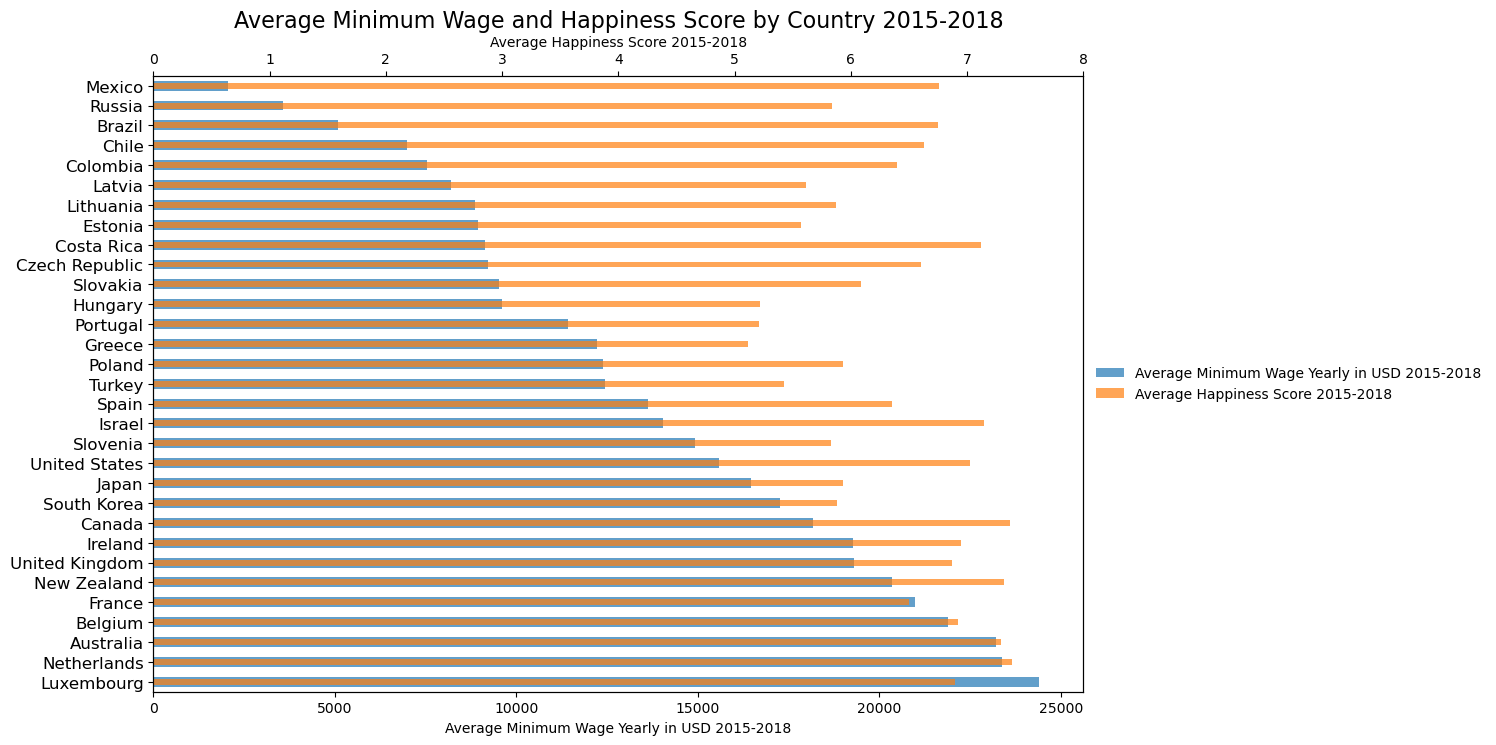

In [34]:
# Create a new figure and axis object with specified size.
fig, ax = plt.subplots(figsize=(12,8))

# Create a horizontal bar chart of Average Minimum Wage by Country using data from the minhap dataframe.
# Set the color to tab blue, alpha to 0.7, height to 0.5 and label to 'Average Minimum Wage Yearly in USD 2015-2018'.
wages_bars = ax.barh(minhap['Country'], minhap['Average Minimum Wage Yearly in USD 2015-2018'],
                     color='tab:blue', alpha=0.7, height=0.5, label='Average Minimum Wage Yearly in USD 2015-2018')

# Set the x-axis label.
ax.set_xlabel('Average Minimum Wage Yearly in USD 2015-2018')

# Set the y-axis tick labels to the Country column from the minhap dataframe.
# and set the font size to 12.
ax.set_yticklabels(minhap['Country'], fontsize=12)

# Create a new x-axis object that shares the same y-axis as ax.
ax2 = ax.twiny()

# Create a horizontal bar chart of Average Happiness Score by Country using data from the minhap dataframe.
# Set the color to tab orange, alpha to 0.7, height to 0.3 and label to 'Average Happiness Score 2015-2018'.
happiness_bars = ax2.barh(minhap['Country'], minhap['Average Happiness Score 2015-2018'], color='tab:orange',
                          alpha=0.7, height=0.3, label='Average Happiness Score 2015-2018')

# Set the x-axis label. 
ax2.set_xlabel('Average Happiness Score 2015-2018')

# Set the x-axis limits from 0 to 8.
ax2.set_xlim(0, 8)

# Set the y-axis limits from -0.5 to the length of the Country column minus 0.5.
ax.set_ylim(-0.5, len(minhap['Country'])-0.5)

# Set the title of the chart with font size of 16.
plt.title('Average Minimum Wage and Happiness Score by Country 2015-2018', fontsize=16)

# Set the legend to show both Average Minimum Wage and Average Happiness Score and place it outside the figure.
# Set the legend handles to the wages_bars and happiness_bars objects.
# Set the location to the center left and the bbox_to_anchor to (1.0, 0.5) to place it outside the figure.
# Set the frameon parameter to False to remove the legend box.
ax.legend(handles=[wages_bars, happiness_bars], loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False)

# Show the chart.
plt.show()

 ### Notes on Findings
 
 ##### This chart shows the average minimum wage and happiness score by country for the years 2015-2018, but it doesn't provide a clear indication of whether there is a significant correlation between the two variables. Nonetheless, it could prove beneficial for providing a more detailed and comprehensive understanding of the data.  A scatter plot with a regression line would be more useful for evaluating the correlation between average minimum wages and happiness scores.

### Graph 2: Scatterplot with Regression Line for Average Minimum Wage and Happiness Scores 2015-2018

Regression Equation: y = 0.000x + 5.682
Correlation Coefficient: 0.450
p-value: 0.011
Standard Error: 0.000


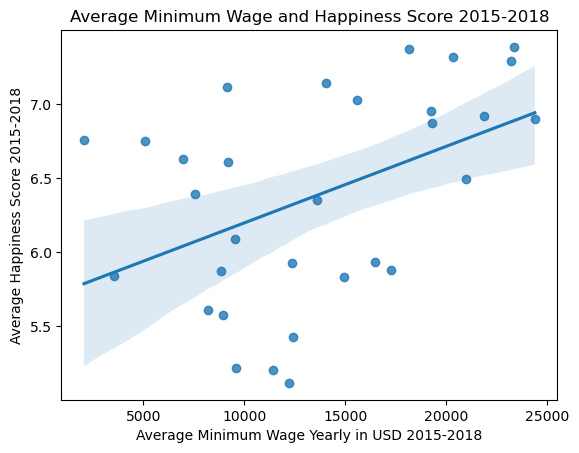

In [35]:
sns.regplot(x='Average Minimum Wage Yearly in USD 2015-2018', y='Average Happiness Score 2015-2018', data=minhap)

#Set the x and y axis labels.
plt.xlabel('Average Minimum Wage Yearly in USD 2015-2018')
plt.ylabel('Average Happiness Score 2015-2018')

#Set the title of the plot.
plt.title('Average Minimum Wage and Happiness Score 2015-2018')

#Calculate the regression equation, correlation coefficient, p-value, and standard error.
slope, intercept, r_value, p_value, std_err = stats.linregress(minhap['Average Minimum Wage Yearly in USD 2015-2018'],
minhap['Average Happiness Score 2015-2018'])
correlation_coefficient = np.corrcoef(minhap['Average Minimum Wage Yearly in USD 2015-2018'], minhap['Average Happiness Score 2015-2018'])[0,1]

#Display the regression equation, correlation coefficient, p-value, and standard error.
#Set the slope, intercept, correlation coefficient, and p_value to .3f to round the numbers to three decimal places.
print(f"Regression Equation: y = {slope:.3f}x + {intercept:.3f}")
print(f"Correlation Coefficient: {correlation_coefficient:.3f}")
print(f"p-value: {p_value:.3f}")
print(f"Standard Error: {std_err:.3f}")

#Display the plot.
plt.show()

### Notes on Findings

##### There is a positive correlation between average minimum wages and average happiness scores. As the average minimum wage increases, so does the average happiness score. 

##### With a p-value less than 0.05 the correlation between between minimum wage and happiness appears to be statistically significant. 





### 7. Compare countries with relatively low minimum wage, but high happiness scores to countries with high minimum wage and high happiness scores on the life evaluation variable of social support.

In [36]:
# Write a function that creates a data frame that filters for countries with relatively 
# low minimum wage but high happiness scores.

def low_minimum_wage_high_happiness(minihappy):
    # Create a new dataframe with the Minimum Wage and Happiness Score columns for each year.
    minhap2 = pd.DataFrame(data=minihappy[['Country', '2015','2016','2017','2018',
                                'Happiness Score_2015', 'Happiness Score_2016',
                                'Happiness Score_2017', 'Happiness Score_2018']])
    
    # Calculate the average minimum wage and happiness scores for each country during 2015-2018
    minhap2['Average Minimum Wage 2015-2018'] = minhap2[['2015','2016','2017','2018']].mean(axis=1)
    minhap2['Average Happiness Score 2015-2018'] = minhap2[['Happiness Score_2015', 'Happiness Score_2016',
                                'Happiness Score_2017', 'Happiness Score_2018']].mean(axis=1)
    
    # Filter for countries with relatively low minimum wage and high happiness scores.
    low_wage_high_happiness = minhap2[(minhap2['Average Minimum Wage 2015-2018'] < 
                                       minhap2['Average Minimum Wage 2015-2018'].median()) & 
                                      (minhap2['Average Happiness Score 2015-2018'] > 
                                       minhap2['Average Happiness Score 2015-2018'].median())] 
    # Sort the result by happiness score in descending order.
    low_wage_high_happiness = low_wage_high_happiness.sort_values(by='Average Happiness Score 2015-2018',ascending=False)
    
    return low_wage_high_happiness

low_happy = low_minimum_wage_high_happiness(minihappy)
low_happy


,Country,2015,2016,2017,2018,Happiness Score_2015,Happiness Score_2016,Happiness Score_2017,Happiness Score_2018,Average Minimum Wage 2015-2018,Average Happiness Score 2015-2018
27,Costa Rica,9007.5,9261.9,9113.7,9132.3,7.226,7.087,7.079,7.072,9128.850,7.11600
16,Mexico,1946.6,2011.8,2079.0,2188.0,7.187,6.778,6.578,6.488,2056.350,6.75775
28,Brazil,4926.0,5059.0,5207.2,5114.3,6.983,6.952,6.635,6.419,5076.625,6.74725
3,Chile,6534.6,6893.9,7178.7,7319.5,6.670,6.705,6.652,6.476,6981.675,6.62575
4,Czech Republic,8217.9,8783.1,9525.6,10342.4,6.505,6.596,6.609,6.711,9217.250,6.60525


##### Create a new data frame to compare the average social support scores for the five countries in the low_happy data frame with the average social support scores for other countries during the years 2015-2018.

In [37]:
# Create a data frame for the average social support scores for the countries in the low_happy data frame.
social_support = minihappy.iloc[[27,16,28,3,4], [0,7, 14, 21, 28]]
social_support['Average Social Support 2015-2018'] = social_support.mean(axis=1)
social_support


/var/folders/fq/ssrkbmxx7mncl8h7g2g0406m0000gn/T/ipykernel_1467/2888609147.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  social_support['Average Social Support 2015-2018'] = social_support.mean(axis=1)


,Country,Social support_2015,Social support_2016,Social support_2017,Social support_2018,Average Social Support 2015-2018
27,Costa Rica,1.23788,1.02152,1.416404,1.459,1.283701
16,Mexico,0.91451,0.71460,1.210862,1.252,1.022993
28,Brazil,1.23287,1.03938,1.431306,1.474,1.294389
3,Chile,1.12447,0.90587,1.284025,1.331,1.161341
4,Czech Republic,1.20643,1.00793,1.433885,1.489,1.284311


In [38]:
social_support.describe()

,Social support_2015,Social support_2016,Social support_2017,Social support_2018,Average Social Support 2015-2018
count,5.000000,5.00000,5.000000,5.000000,5.000000
mean,1.143232,0.93786,1.355296,1.401000,1.209347
std,0.135695,0.13517,0.102015,0.104329,0.117699
min,0.914510,0.71460,1.210862,1.252000,1.022993
25%,1.124470,0.90587,1.284025,1.331000,1.161341
50%,1.206430,1.00793,1.416404,1.459000,1.283701
75%,1.232870,1.02152,1.431306,1.474000,1.284311
max,1.237880,1.03938,1.433885,1.489000,1.294389


In [39]:
# Find the average social support score for countries with low minimum wages but high happiness scores.
low_happy_ss_avg = social_support['Average Social Support 2015-2018'].mean()
low_happy_ss_avg

1.2093470993022915

##### Make a dataframe for countries with relativley high minimum wage and high happiness scores.

In [40]:
# Write a function that creates a data frame that filters for countries with relatively 
# high minimum wage and high happiness scores.

def high_minimum_wage_high_happiness(minihappy):
    # Create a new dataframe with the Minimum Wage and Happiness Score columns for each year.
    minhap3 = pd.DataFrame(data=minihappy[['Country', '2015','2016','2017','2018',
                                'Happiness Score_2015', 'Happiness Score_2016',
                                'Happiness Score_2017', 'Happiness Score_2018']])
    
    # Calculate the average minimum wage and happiness scores for each country during 2015-2018
    minhap3['Average Minimum Wage 2015-2018'] = minhap3[['2015','2016','2017','2018']].mean(axis=1)
    minhap3['Average Happiness Score 2015-2018'] = minhap3[['Happiness Score_2015', 'Happiness Score_2016',
                                'Happiness Score_2017', 'Happiness Score_2018']].mean(axis=1)
    
    # Filter for countries with relatively high minimum wage and high happiness scores.
    high_wage_high_happiness = minhap3[(minhap3['Average Minimum Wage 2015-2018'] > 
                                       minhap3['Average Minimum Wage 2015-2018'].median()) & 
                                      (minhap3['Average Happiness Score 2015-2018'] > 
                                       minhap3['Average Happiness Score 2015-2018'].median())] 
    # Sort the result by happiness score in descending order.
    high_wage_high_happiness = high_wage_high_happiness.sort_values(by='Average Happiness Score 2015-2018',ascending=False)
    
    return high_wage_high_happiness

high_happy = high_minimum_wage_high_happiness(minihappy)
high_happy

,Country,2015,2016,2017,2018,Happiness Score_2015,Happiness Score_2016,Happiness Score_2017,Happiness Score_2018,Average Minimum Wage 2015-2018,Average Happiness Score 2015-2018
17,Netherlands,23036.1,23408.2,23504.6,23520.6,7.378,7.339,7.377,7.441,23367.375,7.38375
2,Canada,17338.9,17606.8,17913.0,19811.1,7.427,7.404,7.316,7.328,18167.450,7.36875
18,New Zealand,19696.3,20238.9,20528.0,20932.5,7.286,7.334,7.314,7.324,20348.925,7.31450
0,Australia,22718.9,22982.2,23187.2,23975.6,7.284,7.313,7.284,7.272,23215.975,7.28825
10,Israel,13068.9,13644.4,14365.4,15104.2,7.278,7.267,7.213,6.814,14045.725,7.14300
26,United States,15976.5,15777.4,15448.3,15080.0,7.119,7.104,6.993,6.886,15570.550,7.02550
9,Ireland,18275.1,19329.9,19474.8,20008.7,6.940,6.907,6.977,6.977,19272.125,6.95025
1,Belgium,22119.2,21908.5,21882.2,21654.4,6.937,6.929,6.891,6.927,21891.075,6.92100
15,Luxembourg,24218.8,24148.6,24671.3,24553.0,6.946,6.871,6.863,6.910,24397.925,6.89750
25,United Kingdom,17970.6,19558.3,19663.3,20053.1,6.867,6.725,6.714,7.190,19311.325,6.87400


In [41]:
# Create a data frame for the average social support scores for the countries in the high_happy data frame.
social_support2 = minihappy.iloc[[17,2,18,0,10,26,9,1,15,25], [0,7,14,21,28]]
social_support2['Average Social Support 2015-2018'] = social_support2.mean(axis=1)
social_support2

/var/folders/fq/ssrkbmxx7mncl8h7g2g0406m0000gn/T/ipykernel_1467/549889473.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  social_support2['Average Social Support 2015-2018'] = social_support2.mean(axis=1)


,Country,Social support_2015,Social support_2016,Social support_2017,Social support_2018,Average Social Support 2015-2018
17,Netherlands,1.28017,1.02912,1.428939,1.488,1.306557
2,Canada,1.32261,1.09610,1.481349,1.532,1.358015
18,New Zealand,1.31967,1.17278,1.548195,1.601,1.410411
0,Australia,1.30923,1.10476,1.510042,1.573,1.374258
10,Israel,1.22393,0.99537,1.376290,1.559,1.288647
26,United States,1.24711,1.04782,1.419921,1.471,1.296463
9,Ireland,1.36948,1.16157,1.558231,1.583,1.418070
1,Belgium,1.28566,1.05249,1.462313,1.483,1.320866
15,Luxembourg,1.21963,1.03999,1.457584,1.520,1.309301
25,United Kingdom,1.28548,1.08672,1.496460,1.433,1.325415


In [42]:
social_support2.describe()

,Social support_2015,Social support_2016,Social support_2017,Social support_2018,Average Social Support 2015-2018
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,1.286297,1.078672,1.473932,1.524300,1.340800
std,0.046888,0.057063,0.057121,0.054957,0.046805
min,1.219630,0.995370,1.376290,1.433000,1.288647
25%,1.255375,1.041948,1.436100,1.484250,1.307243
50%,1.285570,1.069605,1.471831,1.526000,1.323140
75%,1.317060,1.102595,1.506646,1.569500,1.370197
max,1.369480,1.172780,1.558231,1.601000,1.418070


In [43]:
# Find the average social support score for countries with high happiness and high minimum wage.
high_happy_ss_avg = social_support2['Average Social Support 2015-2018'].mean()
high_happy_ss_avg

1.3408003344402315

##### Find the average social support score for all countries .

In [44]:
# Create a data frame that returns the Average social support scores for each country. 
minihappy_ss = minihappy.iloc[:,[0, 7, 14, 21, 28]]
minihappy_ss['Average Social Support 2015-2018'] = minihappy_ss.mean(axis=1)
minihappy_ss

/var/folders/fq/ssrkbmxx7mncl8h7g2g0406m0000gn/T/ipykernel_1467/4187199082.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  minihappy_ss['Average Social Support 2015-2018'] = minihappy_ss.mean(axis=1)
/var/folders/fq/ssrkbmxx7mncl8h7g2g0406m0000gn/T/ipykernel_1467/4187199082.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minihappy_ss['Average Social Support 2015-2018'] = minihappy_ss.mean(axis=1)


,Country,Social support_2015,Social support_2016,Social support_2017,Social support_2018,Average Social Support 2015-2018
0,Australia,1.30923,1.10476,1.510042,1.573,1.374258
1,Belgium,1.28566,1.05249,1.462313,1.483,1.320866
2,Canada,1.32261,1.09610,1.481349,1.532,1.358015
3,Chile,1.12447,0.90587,1.284025,1.331,1.161341
4,Czech Republic,1.20643,1.00793,1.433885,1.489,1.284311
5,Estonia,1.22791,1.05163,1.476671,1.532,1.322053
6,France,1.26038,1.00508,1.387777,1.466,1.279809
7,Greece,0.92933,0.75473,1.239415,1.202,1.031369
8,Hungary,1.20215,0.93164,1.343133,1.401,1.219481
9,Ireland,1.36948,1.16157,1.558231,1.583,1.418070


In [45]:
# Find the average social support score for all countries.
minihappy_ss_avg = minihappy_ss['Average Social Support 2015-2018'].mean()
minihappy_ss_avg

1.2730761028520523

###  8. Compare average social support scores with average happiness scores for all countries.

In [46]:
# Create a data frame for average social support scores and average happiness scores for all coutries.
minihappy_ss = minihappy_ss.set_index('Country')
minihappy_ss2 = minihappy_ss.loc[:,['Average Social Support 2015-2018']]

minihappy_ss2

,Average Social Support 2015-2018
Country,
Australia,1.374258
Belgium,1.320866
Canada,1.358015
Chile,1.161341
Czech Republic,1.284311
Estonia,1.322053
France,1.279809
Greece,1.031369
Hungary,1.219481


In [47]:
# Concatenate minihappy_ss2 series with happiness_score series
social_happy = pd.concat([minihappy_ss2, happiness_score], axis=1)
social_happy

,Average Social Support 2015-2018,Average Happiness Score 2015-2018
Country,,
Australia,1.374258,7.28825
Belgium,1.320866,6.92100
Canada,1.358015,7.36875
Chile,1.161341,6.62575
Czech Republic,1.284311,6.60525
Estonia,1.322053,5.57400
France,1.279809,6.49600
Greece,1.031369,5.11875
Hungary,1.219481,5.22225


In [48]:
# reset index to facilitate creation of charts and plots
social_happy = social_happy.reset_index()
social_happy.head()

,Country,Average Social Support 2015-2018,Average Happiness Score 2015-2018
0,Australia,1.374258,7.28825
1,Belgium,1.320866,6.92100
2,Canada,1.358015,7.36875
3,Chile,1.161341,6.62575
4,Czech Republic,1.284311,6.60525


### 9. Graph 3: Scatterplot with Regression Line for Average Social Support and Happiness Scores 2015-2018

Regression Equation: y = 2.983x + 2.583
Correlation Coefficient: 0.444
p-value: 0.012
Standard Error: 1.118


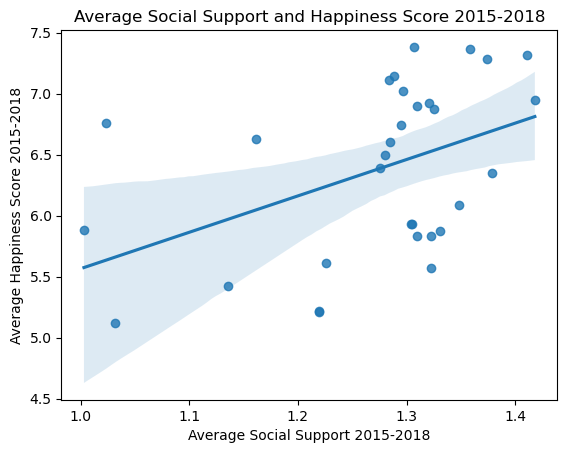

In [49]:
sns.regplot(x='Average Social Support 2015-2018', y='Average Happiness Score 2015-2018', data=social_happy)

#Set the x and y axis labels.
plt.xlabel('Average Social Support 2015-2018')
plt.ylabel('Average Happiness Score 2015-2018')

#Set the title of the plot.
plt.title('Average Social Support and Happiness Score 2015-2018')

#Calculate the regression equation, correlation coefficient, p-value, and standard error.
slope, intercept, r_value, p_value, std_err = stats.linregress(social_happy['Average Social Support 2015-2018'],
social_happy['Average Happiness Score 2015-2018'])
correlation_coefficient = np.corrcoef(social_happy['Average Social Support 2015-2018'], social_happy['Average Happiness Score 2015-2018'])[0,1]

#Display the regression equation, correlation coefficient, p-value, and standard error.
#Set the slope, intercept, correlation coefficient, and p_value to .3f to round the numbers to three decimal places.
print(f"Regression Equation: y = {slope:.3f}x + {intercept:.3f}")
print(f"Correlation Coefficient: {correlation_coefficient:.3f}")
print(f"p-value: {p_value:.3f}")
print(f"Standard Error: {std_err:.3f}")

#Display the plot.
plt.show()

In [50]:
minihappy.head()

,Country,2015,2016,2017,2018,Happiness Score_2015,Economy (GDP per Capita)_2015,Social support_2015,Healthy life expectancy_2015,Freedom_2015,Government Corruption_2015,Generosity_2015,Happiness Score_2016,Economy (GDP per Capita)_2016,Social support_2016,Healthy life expectancy_2016,Freedom_2016,Government Corruption_2016,Generosity_2016,Happiness Score_2017,Economy (GDP per Capita)_2017,Social support_2017,Healthy life expectancy_2017,Freedom_2017,Government Corruption_2017,Generosity_2017,Happiness Score_2018,Economy (GDP per Capita)_2018,Social support_2018,Healthy life expectancy_2018,Freedom_2018,Government Corruption_2018,Generosity_2018
0,Australia,22718.9,22982.2,23187.2,23975.6,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,7.313,1.44443,1.10476,0.85120,0.56837,0.32331,0.47407,7.284,1.484415,1.510042,0.843887,0.601607,0.301184,0.477699,7.272,1.340,1.573,0.910,0.647,0.302,0.361
1,Belgium,22119.2,21908.5,21882.2,21654.4,6.937,1.30782,1.28566,0.89667,0.58450,0.22540,0.22250,6.929,1.42539,1.05249,0.81959,0.51354,0.26248,0.24240,6.891,1.463781,1.462313,0.818092,0.539771,0.251343,0.231503,6.927,1.324,1.483,0.894,0.583,0.240,0.188
2,Canada,17338.9,17606.8,17913.0,19811.1,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,7.404,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,7.316,1.479204,1.481349,0.834558,0.611101,0.287372,0.435540,7.328,1.330,1.532,0.896,0.653,0.291,0.321
3,Chile,6534.6,6893.9,7178.7,7319.5,6.670,1.10715,1.12447,0.85857,0.44132,0.12869,0.33363,6.705,1.21670,0.90587,0.81883,0.37789,0.11451,0.31595,6.652,1.252785,1.284025,0.819480,0.376895,0.082288,0.326662,6.476,1.131,1.331,0.808,0.431,0.061,0.197
4,Czech Republic,8217.9,8783.1,9525.6,10342.4,6.505,1.17898,1.20643,0.84483,0.46364,0.02652,0.10686,6.596,1.30915,1.00793,0.76376,0.41418,0.03986,0.09929,6.609,1.352682,1.433885,0.754444,0.490946,0.036873,0.088107,6.711,1.233,1.489,0.854,0.543,0.034,0.064


In [51]:
minihappy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        31 non-null     object 
 1   2015                           31 non-null     float64
 2   2016                           31 non-null     float64
 3   2017                           31 non-null     float64
 4   2018                           31 non-null     float64
 5   Happiness Score_2015           31 non-null     float64
 6   Economy (GDP per Capita)_2015  31 non-null     float64
 7   Social support_2015            31 non-null     float64
 8   Healthy life expectancy_2015   31 non-null     float64
 9   Freedom_2015                   31 non-null     float64
 10  Government Corruption_2015     31 non-null     float64
 11  Generosity_2015                31 non-null     float64
 12  Happiness Score_2016           31 non-null     float

In [52]:
corrupt_wage = minihappy.iloc[:,[0,10,17,24,31]]
corrupt_wage['Average Government Corruption 2015-2018']=corrupt_wage.mean(axis=1)
corrupt_wage.head()

/var/folders/fq/ssrkbmxx7mncl8h7g2g0406m0000gn/T/ipykernel_1467/2287915035.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  corrupt_wage['Average Government Corruption 2015-2018']=corrupt_wage.mean(axis=1)
/var/folders/fq/ssrkbmxx7mncl8h7g2g0406m0000gn/T/ipykernel_1467/2287915035.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corrupt_wage['Average Government Corruption 2015-2018']=corrupt_wage.mean(axis=1)


,Country,Government Corruption_2015,Government Corruption_2016,Government Corruption_2017,Government Corruption_2018,Average Government Corruption 2015-2018
0,Australia,0.35637,0.32331,0.301184,0.302,0.320716
1,Belgium,0.22540,0.26248,0.251343,0.240,0.244806
2,Canada,0.32957,0.31329,0.287372,0.291,0.305308
3,Chile,0.12869,0.11451,0.082288,0.061,0.096622
4,Czech Republic,0.02652,0.03986,0.036873,0.034,0.034313


In [53]:
corrupt_wage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 6 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Country                                  31 non-null     object 
 1   Government Corruption_2015               31 non-null     float64
 2   Government Corruption_2016               31 non-null     float64
 3   Government Corruption_2017               31 non-null     float64
 4   Government Corruption_2018               31 non-null     float64
 5   Average Government Corruption 2015-2018  31 non-null     float64
dtypes: float64(5), object(1)
memory usage: 1.7+ KB


In [54]:
corrupt_wage2 = corrupt_wage.iloc[:,[0,5]]
corrupt_wage2 = corrupt_wage2.set_index('Country')
corrupt_wage2 = corrupt_wage2.sort_values('Average Government Corruption 2015-2018', ascending=False)
corrupt_wage2.head()

,Average Government Corruption 2015-2018
Country,
New Zealand,0.405019
Luxembourg,0.342776
Australia,0.320716
Canada,0.305308
Netherlands,0.298768


In [55]:
wages_corrupt = pd.concat([mini2, corrupt_wage2], axis=1)
wages_corrupt.head()

,Average Minimum Wage Yearly in USD 2015-2018,Average Government Corruption 2015-2018
Country,,
Luxembourg,24397.925,0.342776
Netherlands,23367.375,0.298768
Australia,23215.975,0.320716
Belgium,21891.075,0.244806
France,20987.050,0.183261


In [56]:
wages_corrupt = wages_corrupt.reset_index()
wages_corrupt.head()

,Country,Average Minimum Wage Yearly in USD 2015-2018,Average Government Corruption 2015-2018
0,Luxembourg,24397.925,0.342776
1,Netherlands,23367.375,0.298768
2,Australia,23215.975,0.320716
3,Belgium,21891.075,0.244806
4,France,20987.050,0.183261


Regression Equation: y = 0.000x + -0.039
Correlation Coefficient: 0.728
p-value: 0.000
Standard Error: 0.000


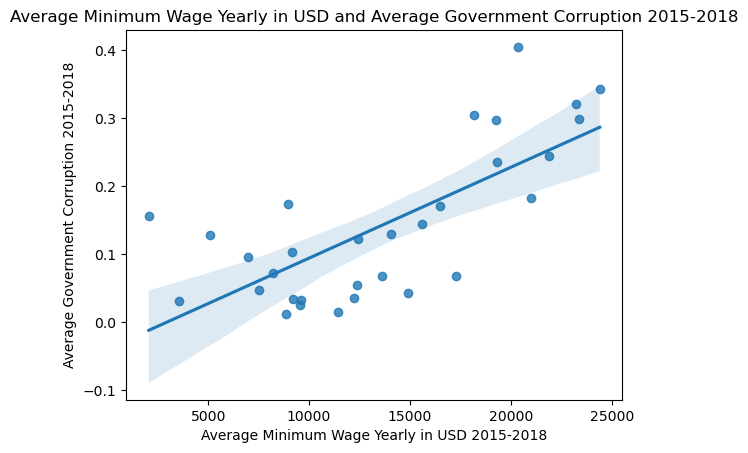

In [57]:
sns.regplot(x='Average Minimum Wage Yearly in USD 2015-2018', y='Average Government Corruption 2015-2018', data=wages_corrupt)

#Set the x and y axis labels.
plt.xlabel('Average Minimum Wage Yearly in USD 2015-2018')
plt.ylabel('Average Government Corruption 2015-2018')

#Set the title of the plot.
plt.title('Average Minimum Wage Yearly in USD and Average Government Corruption 2015-2018')

#Calculate the regression equation, correlation coefficient, p-value, and standard error.
slope, intercept, r_value, p_value, std_err = stats.linregress(wages_corrupt['Average Minimum Wage Yearly in USD 2015-2018'],
wages_corrupt['Average Government Corruption 2015-2018'])
correlation_coefficient = np.corrcoef(wages_corrupt['Average Minimum Wage Yearly in USD 2015-2018'], wages_corrupt['Average Government Corruption 2015-2018'])[0,1]

#Display the regression equation, correlation coefficient, p-value, and standard error.
#Set the slope, intercept, correlation coefficient, and p_value to .3f to round the numbers to three decimal places.
print(f"Regression Equation: y = {slope:.3f}x + {intercept:.3f}")
print(f"Correlation Coefficient: {correlation_coefficient:.3f}")
print(f"p-value: {p_value:.3f}")
print(f"Standard Error: {std_err:.3f}")

#Display the plot.
plt.show()

### Notes on Findings

##### The countries with low minimum wage had a average social support score of 1.20934.
##### The countries with high minimum wage and high happiness had a average social support score of 1.3408.
##### The average social support score for all countries was 1.273

# Conclusion

##### Although there is a significant correlation between minimum wage and happiness scores with a p-value of 0.011, this does not imply causation and there may be other factors influencing happiness scores.

#####  The sample size is relatively small so the results may not be generalizable to countries not present in the data or other time periods.

##### The presence of outliers as seen in both the barchart and scatterplot suggests some variability in the relationship between minimum wage and happiness among different countries.  
 

##### It's interesting to note that countries with low minimum wage, but high happiness had lower average social support scores than countries with high minimum wage and high happiness as well as the average social supprt scores for all countries.  It's possible these reults are due to the small sample size used in this study.  A larger sample sizae would be more appropriate.  

##### The fact that the low_happy and high_happy functions returned less countries that were below the median on minimum wage and above the median on happiness scores than there were for countries that were above the median on both minimum wage and happiness scores could be interpreted as lending support to there being a significant positive correlation between minimum wage and happiness scores.

## Suggestions for Further Study

##### It may be useful to expand the study to include more countries and cover a larger time period.

##### Explore the relationships between other variables in the datasets:
##### 1. Compare happiness scores with social support.
##### 2. Compare happiness scores and minimum wage with generosity.
##### 3. Compare minimum wage and happiness scores with government corruption.


##### Explore the relationship between happiness and other socioeconomic factors not present in these datasets such as income inequlity, education level and employment rate and how they interact with minimum wage.

##### Explore the relationship between minimum wage and different demographic groups, such as age, gender and race to understand how it impacts happiness among these different groups.

